In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
df = pd.read_csv('C:\\Users\\asada\\Desktop\\ml_projects\\not_completed\\fake_news\\fake_and_real_news.csv')

In [126]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [127]:
df.isna().any()

Text     False
label    False
dtype: bool

In [128]:
df.isna().sum()

Text     0
label    0
dtype: int64

In [129]:
df.describe()

,Text,label
count,9900,9900
unique,9865,2
top,Highlights: The Trump presidency on April 13 a...,Fake
freq,8,5000


In [130]:
df['label'].unique()

array(['Fake', 'Real'], dtype=object)

In [131]:
df['Text'].describe()

count                                                  9900
unique                                                 9865
top       Highlights: The Trump presidency on April 13 a...
freq                                                      8
Name: Text, dtype: object

In [132]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
def preprocess_text(text):
    
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

In [134]:
preprocessed_data = df['Text'].apply(preprocess_text)

In [135]:
df['text'] = preprocessed_data

In [136]:
df.head()

,Text,label,text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,top trump surrog brutal stab back pathet video...
1,U.S. conservative leader optimistic of common ...,Real,u conserv leader optimist common ground health...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,trump propos u tax overhaul stir concern defic...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,court forc ohio allow million illeg purg voter...
4,Democrats say Trump agrees to work on immigrat...,Real,democrat say trump agre work immigr bill wall ...


In [137]:
df_final = df.drop('Text', axis = 'columns')

In [138]:
df_final.head()

,label,text
0,Fake,top trump surrog brutal stab back pathet video...
1,Real,u conserv leader optimist common ground health...
2,Real,trump propos u tax overhaul stir concern defic...
3,Fake,court forc ohio allow million illeg purg voter...
4,Real,democrat say trump agre work immigr bill wall ...


In [139]:
df_final['label'].unique()

array(['Fake', 'Real'], dtype=object)

In [140]:
counts = df_final['label'].value_counts()
counts

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [141]:
df_final['label'] = df_final['label'].map({'Fake': 0, 'Real': 1})

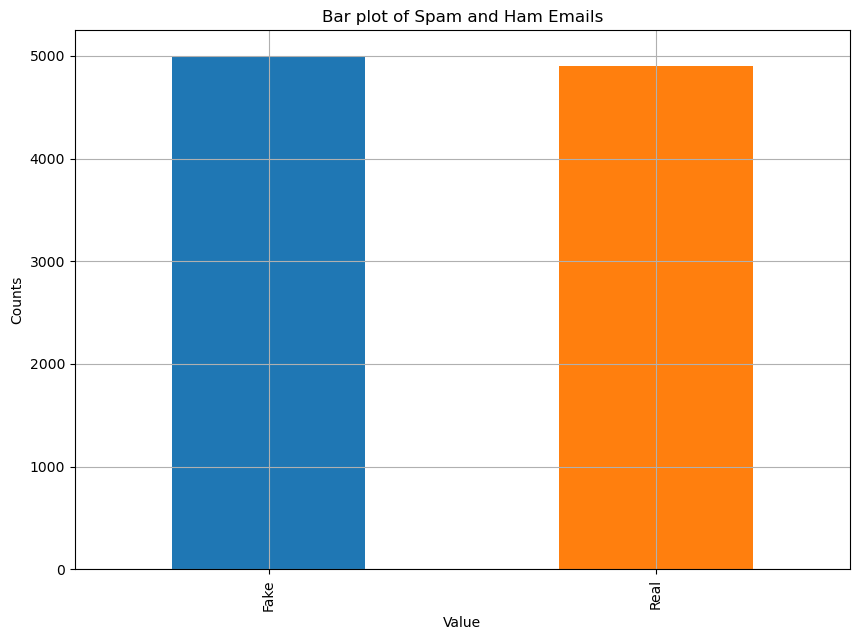

In [142]:
plt.figure(figsize = (10,7))
counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.grid()
plt.title('Bar plot of Spam and Ham Emails')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

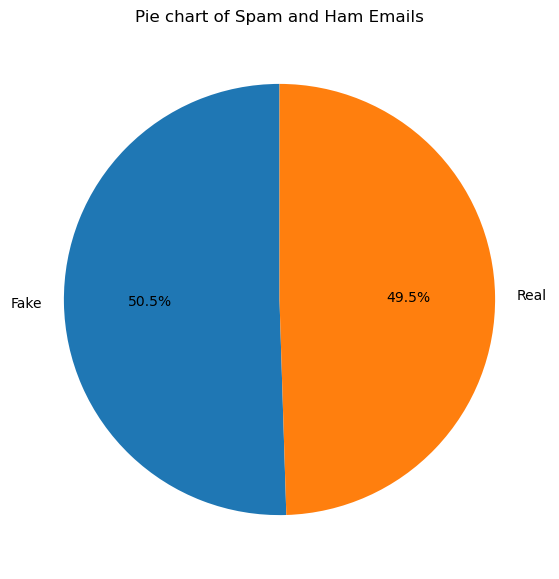

In [143]:
plt.figure(figsize = (10,7))
plt.pie(counts, labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of Spam and Ham Emails')
plt.show()

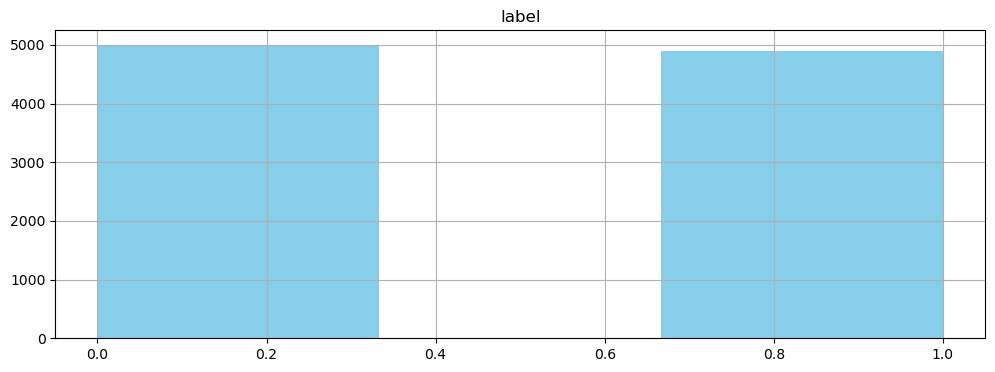

In [144]:
df_final.hist(column = 'label',figsize=(12,4), bins = 3,color='skyblue')
plt.show()

In [145]:
def plot_ngrams(ax, texts, ngram_range=(2, 2), num_top_ngrams=25, title=''):
    
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    ngram_counts = X.sum(axis=0).A1
    ngram_dict = dict(zip(feature_names, ngram_counts))
    sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)
    top_ngrams = sorted_ngrams[:num_top_ngrams]
    sns.barplot(ax=ax, x=[ngram[1] for ngram in top_ngrams],
                y=[ngram[0] for ngram in top_ngrams],
                orient="h",
                width=0.5,
                palette='Spectral')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('N-gram')
    ax.set_title(title)

In [146]:
real_news = df_final[df_final['label'] == 1]['text']
fake_news = df_final[df_final['label'] == 0]['text']

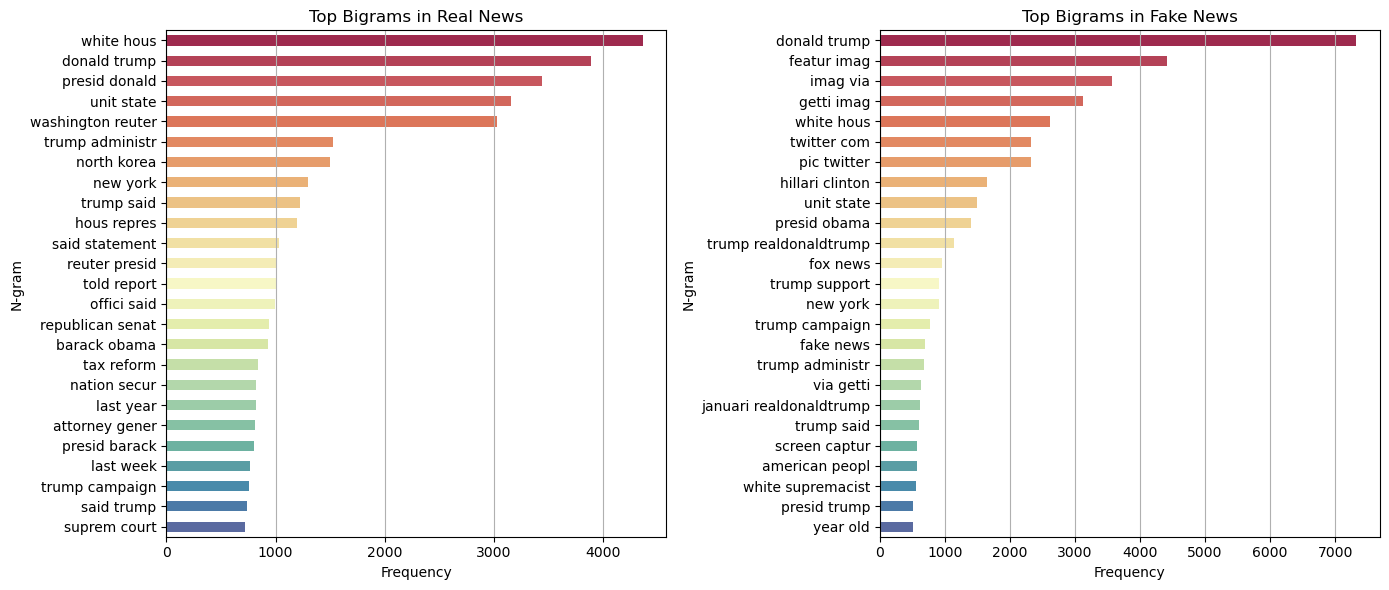

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_ngrams(axes[0], real_news, title='Top Bigrams in Real News')
plot_ngrams(axes[1], fake_news, title='Top Bigrams in Fake News')
axes[0].grid(axis='x')
axes[1].grid(axis='x')
plt.tight_layout()
plt.show()

In [148]:
df_final.head()

,label,text
0,0,top trump surrog brutal stab back pathet video...
1,1,u conserv leader optimist common ground health...
2,1,trump propos u tax overhaul stir concern defic...
3,0,court forc ohio allow million illeg purg voter...
4,1,democrat say trump agre work immigr bill wall ...


In [149]:
X = df_final['text']
y = df_final['label']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB    

In [152]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)

In [153]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Lasso': Lasso(max_iter=10000),  
    'Multinomial Naive Bayes': MultinomialNB(),
    
}


params = {
    'Logistic Regression': [{'penalty': ['l2'], 'C': [0.1]}],  
    'Random Forest Classifier': [{'max_depth': [None], 'n_estimators': [100]}], 
    'Support Vector Machine': [{'C': [10], 'gamma': ['scale']}],  
    'Lasso': [{'alpha': [0.1]}],  
    'Multinomial Naive Bayes': [{'alpha': [0.1]}],  
}


grid_search_params = {'cv': 5, 'verbose': 1}


In [154]:
for name, model in models.items():
    param_grid = params[name]
    grid_search = GridSearchCV(model, param_grid, **grid_search_params)
    
    
    grid_search.fit(X_train_count, y_train)
    
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.9972222222222223
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Best score for Random Forest Classifier: 0.9984848484848484
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale'}
Best score for Support Vector Machine: 0.9957070707070708
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.7386115877993756
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Multinomial Naive Bayes: {'alpha': 0.1}
Best score for Multinomial Naive Bayes: 0.9724747474747474


In [155]:
clf = Pipeline([
    ('Vectorzier', CountVectorizer()),
    ('rf' , RandomForestClassifier(max_depth = None, n_estimators = 100))
])

In [156]:
clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorzier', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [157]:
clf.score(X_test, y_test)

0.9964646464646465

In [158]:
y_predicted = clf.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

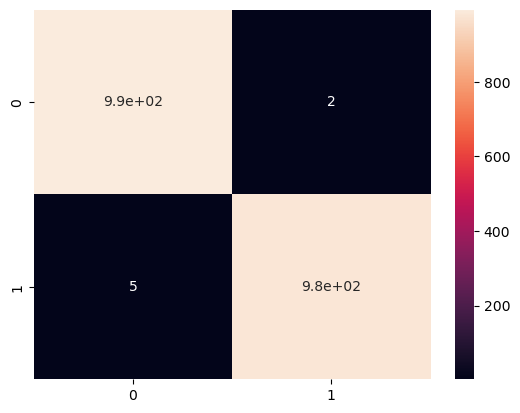

In [160]:
import seaborn as sns

sns.heatmap(cm, annot = True)
plt.show()

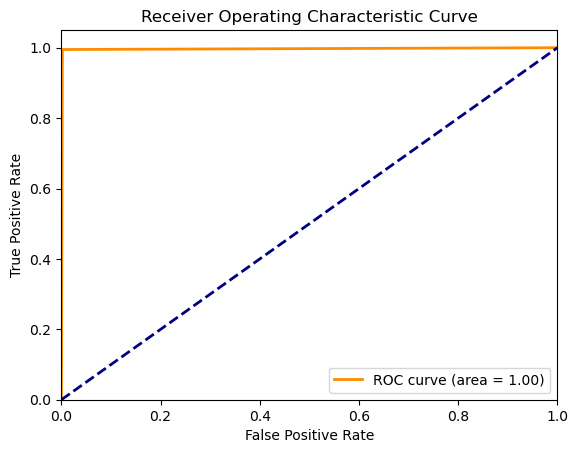

In [162]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [164]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       996
           1       1.00      0.99      1.00       984

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [165]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9964646464646465
